In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/Users/himanshugupta/Documents/python/Jupyter notebooks/zomato/zomato.csv',encoding='latin-1')

In [23]:
df.shape

(9551, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [26]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


1- missing value
2- explore about numerical value
3-explore about categorical values
4- finding relationship between feature

In [27]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['Cuisines']

In [28]:
df_country = pd.read_excel('/Users/himanshugupta/Documents/python/Jupyter notebooks/zomato/Country-Code.xlsx')

In [29]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [30]:
df_country.shape

(15, 2)

In [31]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')

In [33]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [35]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [37]:

country_values = final_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

ploting pie chart for top 3 country

([<matplotlib.patches.Wedge at 0x138a24410>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

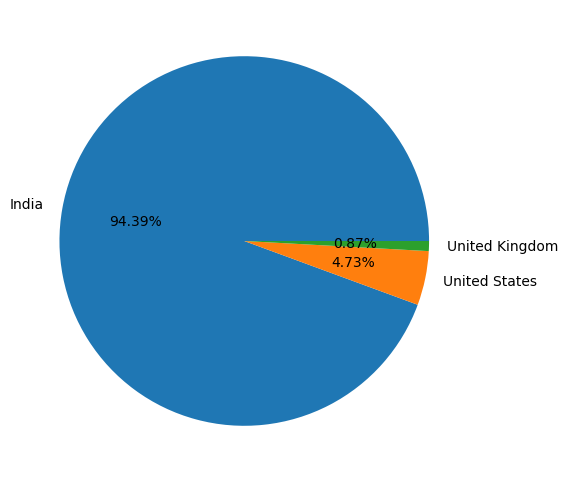

In [60]:
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%')

Observations:- India has the highest zomato users/transactions followed by united states and UK

In [48]:
types_of_feature

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [57]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


1- when rating is between 4.5-4.9 ------->Excellent

2- when rating is between 4.0-4.4 ------->Very good

3- when rating is between 3.5-3.9 ------->good

4- when rating is between 2.5-3.4 ------->Average

5- when rating is between 1.8-2.4 ------->poor

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating count'>

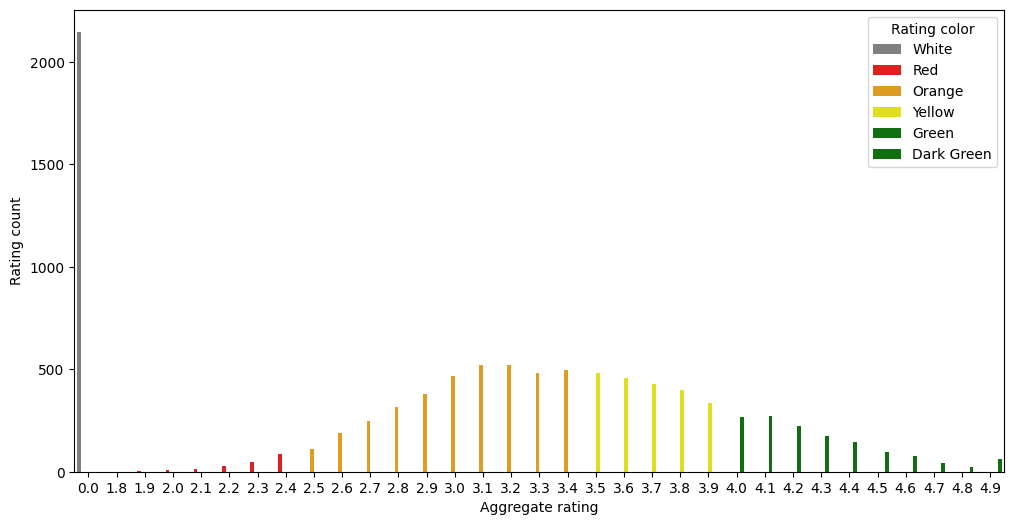

In [62]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y ='Rating count',hue='Rating color',palette=['gray','red','orange','yellow','green','green'],data=ratings)

Observations

1- Not rated count is very high


2- maximum rating between 2.5 to 3.4

In [64]:
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

finding country which have 0 rating

In [79]:
# first way
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Zero Rating'})

,Country,Zero Rating
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [84]:
#second way
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Maximum 0 rating are given by indian users

In [86]:
types_of_feature

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [93]:
final_df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

Which country are using which currency?

In [96]:
final_df.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


which country are providing online delivery?


In [97]:
final_df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


TOP 5 City which has highest order

In [101]:
final_df.groupby(['Country','City']).size().reset_index()

,Country,City,0
0,Australia,Armidale,1
1,Australia,Balingup,1
2,Australia,Beechworth,1
3,Australia,Dicky Beach,1
4,Australia,East Ballina,1
...,...,...,...
136,United States,Valdosta,20
137,United States,Vernonia,1
138,United States,Waterloo,20
139,United States,Weirton,1


In [103]:
cities_names = final_df.City.value_counts().index
cities_names

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [105]:
cities_value = final_df.City.value_counts().values
cities_value

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x13b938190>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

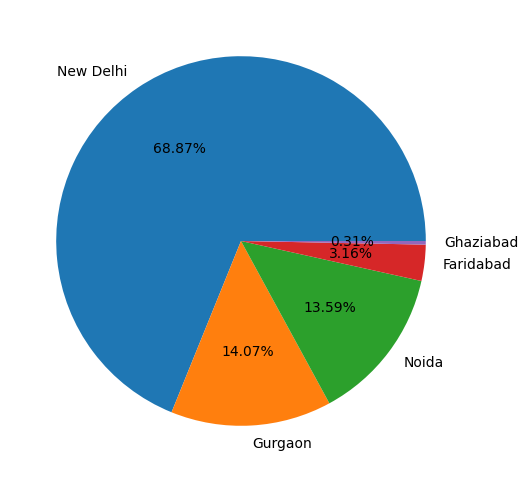

In [109]:
plt.pie(cities_value[:5],labels=cities_names[:5],autopct='%1.2f%%')

Top 10 cuisines

In [111]:
types_of_feature

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [123]:
final_df['Cuisines'].fillna('Missing',inplace=True)

In [127]:
final_df.groupby(['Cuisines','Country']).size().reset_index()

,Cuisines,Country,0
0,Afghani,India,4
1,"Afghani, Mughlai, Chinese",India,1
2,"Afghani, North Indian",India,1
3,"Afghani, North Indian, Pakistani, Arabian",India,1
4,African,South Africa,1
...,...,...,...
1984,"Western, Asian, Cafe",Indonesia,1
1985,"Western, Fusion, Fast Food",Singapore,1
1986,World Cuisine,Turkey,1
1987,"World Cuisine, Mexican, Italian",Turkey,1


In [132]:
cuisines_name = final_df['Cuisines'].value_counts().index
cuisines_name

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', length=1826)

In [134]:
cuisine_value = final_df['Cuisines'].value_counts().values
cuisine_value

array([936, 511, 354, ...,   1,   1,   1])

([<matplotlib.patches.Wedge at 0x13bbd4a10>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664212, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632158168

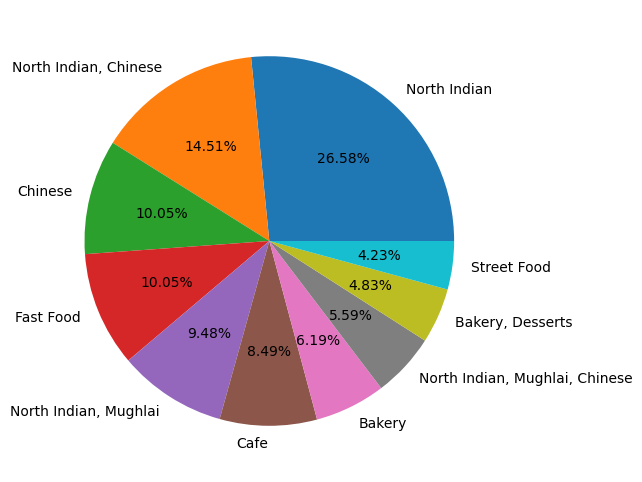

In [138]:
plt.pie(cuisine_value[:10],labels=cuisines_name[:10],autopct='%1.2f%%')